# CDS-102: Lab 8 Workbook
## Helena Gray
### March 23, 2017

The code below imports the tidyverse package which will be used for analysis. It then reads in a comma separate value file into a variable named 'newcomb'.

In [1]:
# Run this code block to load the Tidyverse package
.libPaths(new = "~/Rlibs")
library(tidyverse)
newcomb<-read.csv("newcomb.csv")
newcomb

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


X  x  
1   1  28
2   2 -44
3   3  29
4   4  30
5   5  24
6   6  28
7   7  37
8   8  32
9   9  36
10 10  27
11 11  26
12 12  28
13 13  29
14 14  26
15 15  27
16 16  22
17 17  23
18 18  20
19 19  25
20 20  25
21 21  36
22 22  23
23 23  31
24 24  32
25 25  24
26 26  27
27 27  33
28 28  16
29 29  24
30 30  29
⋮  ⋮  ⋮  
37 37 32 
38 38 25 
39 39 28 
40 40 24 
41 41 40 
42 42 21 
43 43 31 
44 44 32 
45 45 28 
46 46 26 
47 47 30 
48 48 27 
49 49 26 
50 50 24 
51 51 32 
52 52 29 
53 53 34 
54 54 -2 
55 55 25 
56 56 19 
57 57 36 
58 58 29 
59 59 30 
60 60 22 
61 61 28 
62 62 33 
63 63 39 
64 64 25 
65 65 16 
66 66 23

### Lab Task 1 ###

The code below plots a histogram of the dataset using ggplot2.

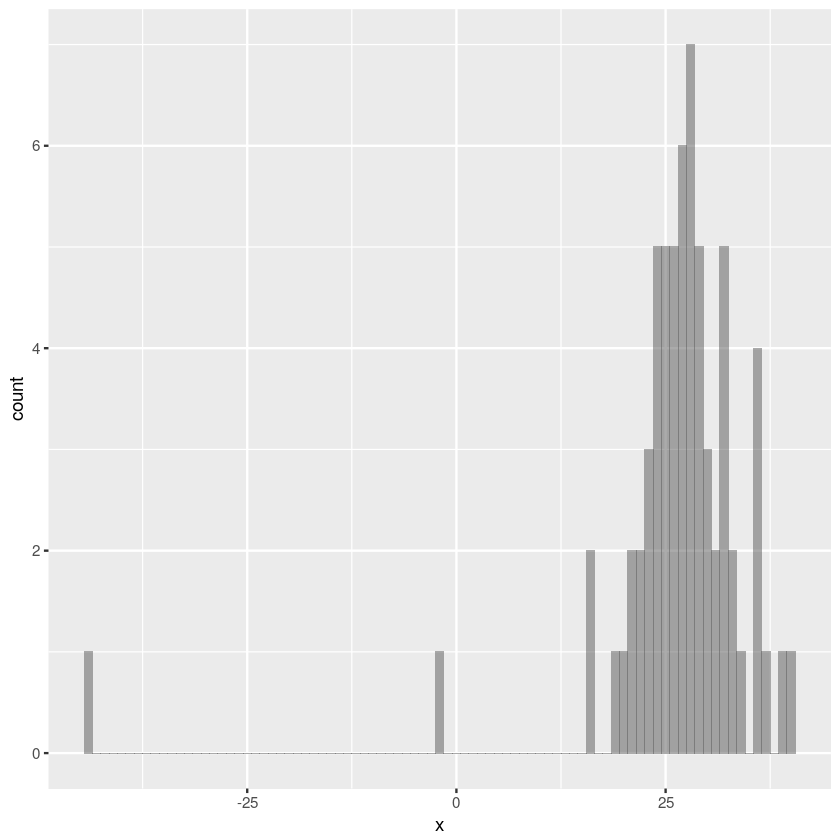

In [2]:
newcomb.ggplot<-ggplot(data=newcomb)  + geom_histogram(binwidth = 1, mapping = aes(x=x), alpha=.5)
ggsave("newcomb.ggplot.png", plot = newcomb.ggplot, device="png", scale=1, width=5, height=4)
newcomb.ggplot

### Lab Task 2 ###

A variable is created called 'newcomb_1' which filters out all the values of 'x' under 0.

In [3]:
newcomb_1<-filter(newcomb, x>0)


### Lab Task 3 ###

The code below gives summary statistics for the filtered data set 'newcomb' and the unfiltered dataset 'newcomb_1'.

In [4]:
stat.table.filtered<-summarise(newcomb_1,
 mean=mean(x), max=max(x),min=min(x),range=max(x)-min(x),var=var(x), sd=sd(x))
stat.table.filtered

stat.table<-summarise(newcomb,
 mean=mean(x), max=max(x),min=min(x),range=max(x)-min(x),var=var(x), sd=sd(x))
stat.table


mean  max min range var      sd      
1 27.75 40  16  24    25.84127 5.083431

mean     max min range var     sd      
1 26.21212 40  -44 84    115.462 10.74532

### Lab Task 4 ###

The code below uses the dnorm() function to calculate the probability distribution for the filtered and unfiltered datasets.
It takes the 'x' values (from the distribution) as input and returns the probability (taken from the bell curve) as output.

In [5]:

newcomb_1_pdf<-dnorm(x=newcomb_1$x , mean = 27.75 , sd = 5.083431)

newcomb_pdf<-dnorm(x=newcomb$x , mean = 26.21212 , sd = 10.745)

### Lab Task 5 ###

The code below converts the histogram (unfiltered dataset only) into a probability mass function using
the ggplot_build() function and stores the PMF values in a tibble.

In [6]:
data.ggplot.full <- ggplot_build(newcomb.ggplot)
data.ggplot.table <- data.ggplot.full$data[[1]]
histogram.table <- tibble(x = data.ggplot.table$x, density = data.ggplot.table$density, frequency = data.ggplot.table$count)
#data.ggplot.table


### Lab Task 6 ###

A plot is created that overlays the normal distribution models on top of the PMF to see how
well that they agree.

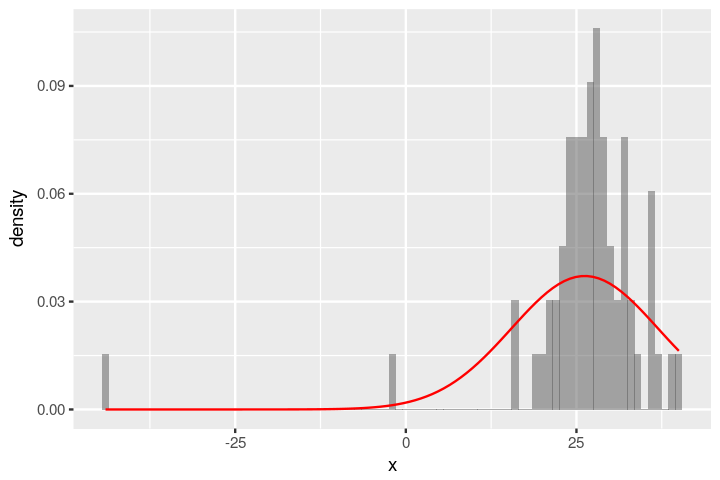

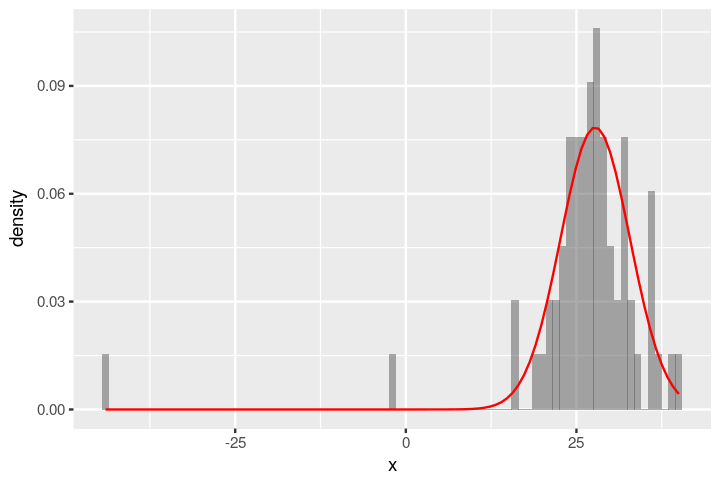

In [7]:

options(repr.plot.width = 6, repr.plot.height = 4)
data.ggplot_1<-ggplot(data=histogram.table)  + geom_col(mapping = aes(x=x, y=density), alpha=.5) + stat_function(fun=dnorm, args=list(mean=mean(newcomb$x),sd=sd(newcomb$x)), color= "red")
ggsave("data.ggplot_1.png", plot = data.ggplot_1, device="png", scale=1, width=5, height=4)
data.ggplot_1



options(repr.plot.width = 6, repr.plot.height = 4)
data.ggplot_2<-ggplot(data=histogram.table)  + geom_col(mapping = aes(x=x, y=density), alpha=.5) + stat_function(fun=dnorm, args=list(mean=mean(newcomb_1$x),sd=sd(newcomb_1$x)), color= "red")
ggsave("data.ggplot_2.png", plot = data.ggplot_2, device="png", scale=1, width=5, height=4)
data.ggplot_2

### Lab Task 7 ###
The code below creates a cumulative distribution function generator for both the unfiltered and filtered
datasets using the ecdf() function. Two tibbles are created, each with two
columns. In each tibble the first column is t that contains values running from -45 to 45
in increments of 0.1, and the second column is cdf containing values of the cdf generator
evaluated at the same values of t.

In [8]:

newcomb_1_range_vector <- seq(-45,45.1)
newcomb_1_cdf_generator <- ecdf(newcomb_1$x)
newcomb_1_cdf <- tibble(score = newcomb_1_range_vector, CDF = newcomb_1_cdf_generator(newcomb_1_range_vector))

newcomb_range_vector <- seq(-45,45.1)
newcomb_cdf_generator <- ecdf(newcomb$x)
newcomb_cdf <- tibble(score = newcomb_range_vector, CDF = newcomb_cdf_generator(newcomb_range_vector))


### Lab Task 8 ###

The code below creates the corresponding CDF for the normal distribution models (both unfiltered and
filtered) using the qnorm() function. The two CDFs are evaluated in the range from 0 to 1 in
increments of 0.01. The results are stored in two tibbles, each with two columns (this includes t,
which is just the 0 to 1 range in increments of 0.01, and the CDF values).

In [9]:

newcomb_1_percentiles <- seq(0, 1, 0.01)
newcomb_1_cdf_model <- tibble(CDF = newcomb_1_percentiles,
                        score = qnorm(p = newcomb_1_percentiles, mean = 27.75, sd = 5.08))


newcomb_percentiles <- seq(0, 1, 0.01)
newcomb_cdf_model <- tibble(CDF = newcomb_percentiles,
                        score = qnorm(p = newcomb_percentiles, mean = 26.21, sd = 10.74))

### Lab Task 9###

The code below visually compares the CDFs of models and datasets to estimate the quality of agreement. 2 plots are created that overlay the two model CDFs on top of the unfiltered and filtered datasets CDFs.


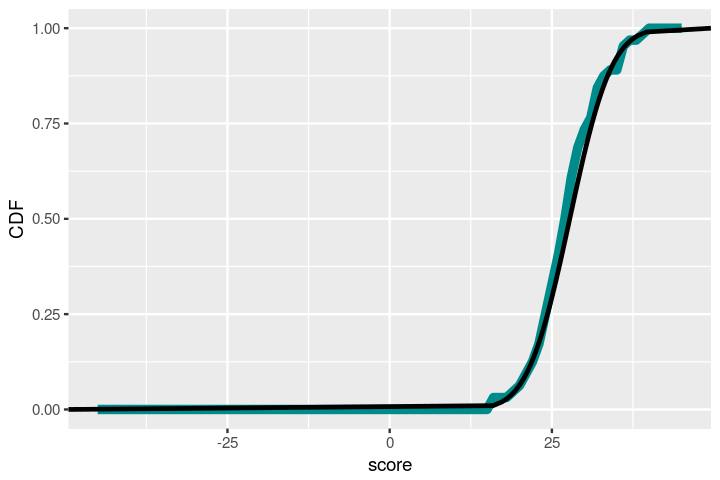

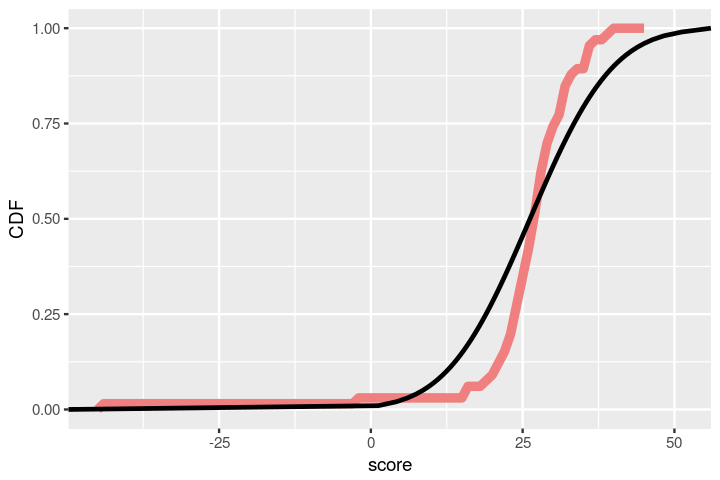

In [10]:
# Create Plot
cdf.filtered<-ggplot(newcomb_1_cdf) +
geom_line(mapping = aes(x = score, y = CDF), color = "cyan4", size = 2) +
geom_line(data = newcomb_1_cdf_model, mapping = aes(x = score, y = CDF), color = "black", size = 1)
ggsave("cdf.filtered.png", plot = cdf.filtered, device="png", scale=1, width=5, height=4)
cdf.filtered
# Create Plot
cdf.unfiltered<-ggplot(newcomb_cdf) +
geom_line(mapping = aes(x = score, y = CDF), color = "lightcoral", size = 2) +
geom_line(data = newcomb_cdf_model, mapping = aes(x = score, y = CDF), color = "black", size = 1)
ggsave("cdf.unfiltered.png", plot = cdf.unfiltered, device="png", scale=1, width=5, height=4)
cdf.unfiltered

### Lab Task 10 ###

The code below calculates the confidence interval for the unfiltered and filtered datasets, and then prints out the two versions of the experimental result in the format mean ± confidence interval.

In [11]:
ci_filtered<- 2 * stat.table.filtered$sd
ci<- 2 * stat.table$sd

cat("The confidence interval for the unfiltered dataset is ", stat.table$mean, "+-",ci,"\n")
cat("The confidence interval for the unfiltered dataset is ", stat.table.filtered$mean, "+-",ci_filtered)

The confidence interval for the unfiltered dataset is  26.21212 +- 21.49065 
The confidence interval for the unfiltered dataset is  27.75 +- 10.16686

The code below performs a 1 sample t-test which can tell us the probability that the confidence interval obtained contains the true mean.

In [12]:
t.test(x = newcomb$x, mu = 33.02)


	One Sample t-test

data:  newcomb$x
t = -5.1471, df = 65, p-value = 2.648e-06
alternative hypothesis: true mean is not equal to 33.02
95 percent confidence interval:
 23.57059 28.85365
sample estimates:
mean of x 
 26.21212 
